In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

query = 'organic food ireland' #near:"Dublin"'
tweets = []
limit = 5000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append(tweet)
        
df_tweets = pd.DataFrame(tweets)



In [3]:
#df_tweets.to_csv('tweets_organic_food ireland.csv')

In [4]:
#Cleaning Data-adding column location
df_tweets['user_location'] =  df_tweets['user'].apply(lambda x: x['location'])

In [5]:
#Cleaning Data-flter and keep only columns that we will use in the dataset
df_tweets= df_tweets.filter(['content','user_location'], axis=1)
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        1753 non-null   object
 1   user_location  1753 non-null   object
dtypes: object(2)
memory usage: 27.5+ KB


In [6]:
#Cleaning Data-change words in the 'content' column to lower case
df_tweets['content'] = df_tweets['content'].apply(lambda x:x.lower())
df_tweets['content']

0       @lynnhow90745645 @wendythepooh63 @cioccolanti ...
1       johnson had £27 000 takeaways and organic food...
2       @umpteenthtym yeah irelands wealth due to mult...
3       it's the beginning of a journey. \n🌞 #growyour...
4       @_neilorangepeel @foolsfestival @belfastcc @vi...
                              ...                        
1748    very cool: organic supermarket in ireland comb...
1749    rt @organic_ireland today's wise advice "eat f...
1750    rt @neilers if you like organic food then chec...
1751    +101 new entry: organic food ireland | pasta, ...
1752    organic guide: a publication of interest to ev...
Name: content, Length: 1753, dtype: object

In [7]:
#import natural processing toolkit
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Z\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
#Cleaning Data-remove english stopwords
df_tweets['content'] = df_tweets['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_tweets['content'].head()

0    @lynnhow90745645 @wendythepooh63 @cioccolanti ...
1    johnson £27 000 takeaways organic food £73 000...
2    @umpteenthtym yeah irelands wealth due multina...
3    beginning journey. 🌞 #growyourown year spent m...
4    @_neilorangepeel @foolsfestival @belfastcc @vi...
Name: content, dtype: object

In [9]:
#Cleaning Data-remove special characters
df_tweets['content'] = df_tweets['content'].str.replace('[^\w\s]','')
df_tweets['content'].head()

0    lynnhow90745645 wendythepooh63 cioccolanti cos...
1    johnson 27 000 takeaways organic food 73 000 w...
2    umpteenthtym yeah irelands wealth due multinat...
3    beginning journey  growyourown year spent most...
4    _neilorangepeel foolsfestival belfastcc visitb...
Name: content, dtype: object

In [10]:
#Cleaning Data-check for most frequent words in the 'content column'
from collections import Counter
df_wordCounter= Counter(" ".join(df_tweets['content']).split()).most_common(50)
df_wordCounter

[('organic', 1989),
 ('food', 1679),
 ('ireland', 1472),
 ('amp', 281),
 ('irelands', 217),
 ('foods', 189),
 ('organicfood', 149),
 ('good', 143),
 ('farm', 121),
 ('local', 121),
 ('irish', 120),
 ('farming', 120),
 ('produce', 97),
 ('healthy', 95),
 ('market', 84),
 ('best', 83),
 ('first', 82),
 ('great', 78),
 ('farmers', 76),
 ('one', 74),
 ('health', 69),
 ('fair', 69),
 ('northern', 68),
 ('people', 67),
 ('production', 67),
 ('like', 66),
 ('would', 66),
 ('national', 65),
 ('free', 63),
 ('new', 62),
 ('uk', 60),
 ('us', 58),
 ('green', 58),
 ('dublin', 58),
 ('rt', 58),
 ('grow', 57),
 ('learn', 53),
 ('producers', 53),
 ('vegan', 52),
 ('via', 52),
 ('products', 51),
 ('eu', 49),
 ('fresh', 49),
 ('growing', 48),
 ('buy', 48),
 ('news', 48),
 ('sustainable', 47),
 ('range', 47),
 ('restaurant', 45),
 ('agriculture', 45)]

In [11]:

nltk.download('wordnet')
from textblob import Word
df_tweets['content'] = df_tweets['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df_tweets['content'].head()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Z\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    lynnhow90745645 wendythepooh63 cioccolanti cos...
1    johnson 27 000 takeaway organic food 73 000 wi...
2    umpteenthtym yeah ireland wealth due multinati...
3    beginning journey growyourown year spent mostl...
4    _neilorangepeel foolsfestival belfastcc visitb...
Name: content, dtype: object

In [12]:
#Cleaning Data-check for most frequent words in the 'content column' after applying lemmatiser
from collections import Counter
df_wordCounter= Counter(" ".join(df_tweets['content']).split()).most_common(50)
df_wordCounter

[('organic', 1998),
 ('food', 1868),
 ('ireland', 1689),
 ('amp', 281),
 ('organicfood', 149),
 ('good', 148),
 ('farm', 140),
 ('local', 122),
 ('irish', 120),
 ('farming', 120),
 ('farmer', 118),
 ('produce', 100),
 ('healthy', 95),
 ('market', 91),
 ('best', 83),
 ('first', 82),
 ('one', 78),
 ('great', 78),
 ('product', 71),
 ('health', 69),
 ('fair', 69),
 ('northern', 68),
 ('people', 68),
 ('production', 67),
 ('like', 67),
 ('would', 66),
 ('national', 65),
 ('u', 64),
 ('uk', 64),
 ('free', 64),
 ('producer', 63),
 ('new', 62),
 ('restaurant', 62),
 ('year', 60),
 ('green', 59),
 ('dublin', 58),
 ('rt', 58),
 ('grow', 57),
 ('vegan', 53),
 ('learn', 53),
 ('via', 52),
 ('seed', 51),
 ('eu', 51),
 ('need', 50),
 ('fresh', 49),
 ('company', 48),
 ('growing', 48),
 ('buy', 48),
 ('sale', 48),
 ('news', 48)]

In [13]:
#
from textblob import TextBlob
TextBlob(df_tweets['content'][0]).ngrams(2)

[WordList(['lynnhow90745645', 'wendythepooh63']),
 WordList(['wendythepooh63', 'cioccolanti']),
 WordList(['cioccolanti', 'cosumbi']),
 WordList(['cosumbi', 'byheart']),
 WordList(['byheart', 'think']),
 WordList(['think', 'look']),
 WordList(['look', 'pretty']),
 WordList(['pretty', 'good']),
 WordList(['good', 'similac']),
 WordList(['similac', 'also']),
 WordList(['also', 'one']),
 WordList(['one', 'ireland']),
 WordList(['ireland', 'thats']),
 WordList(['thats', 'grassfed']),
 WordList(['grassfed', 'milk']),
 WordList(['milk', 'le']),
 WordList(['le', 'crappy']),
 WordList(['crappy', 'ingredient']),
 WordList(['ingredient', 'lot']),
 WordList(['lot', 'organic']),
 WordList(['organic', 'one']),
 WordList(['one', 'sold']),
 WordList(['sold', 'whole']),
 WordList(['whole', 'food']),
 WordList(['food', 'wouldnt']),
 WordList(['wouldnt', 'touch']),
 WordList(['touch', 'way']),
 WordList(['way', 'many']),
 WordList(['many', 'seed']),
 WordList(['seed', 'oil'])]

In [14]:
#
tf1 = (df_tweets['content'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,000,3
1,900,2
2,johnson,1
3,second,1
4,ireland,1
5,across,1
6,bridge,1
7,room,1
8,press,1
9,million,1


In [15]:
#
import numpy as np
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df_tweets.shape[0]/(len(df_tweets[df_tweets['content'].str.contains(word)])))
tf1

,words,tf,idf
0,000,3,5.271859
1,900,2,7.469084
2,johnson,1,6.775937
3,second,1,5.677324
4,ireland,1,0.004574
5,across,1,4.904135
6,bridge,1,4.904135
7,room,1,4.424561
8,press,1,5.071189
9,million,1,3.913736


In [16]:
#
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,000,3,5.271859,15.815578
1,900,2,7.469084,14.938168
2,johnson,1,6.775937,6.775937
3,second,1,5.677324,5.677324
4,ireland,1,0.004574,0.004574
5,across,1,4.904135,4.904135
6,bridge,1,4.904135,4.904135
7,room,1,4.424561,4.424561
8,press,1,5.071189,5.071189
9,million,1,3.913736,3.913736


In [17]:
#
df_tweets['content'].apply(lambda x: TextBlob(x).sentiment)

0                                   (0.4125, 0.625)
1       (-0.00876623376623377, 0.31720779220779216)
2                                   (-0.125, 0.375)
3                      (0.15000000000000002, 0.275)
4                       (0.47000000000000003, 0.61)
                           ...                     
1748                                   (0.575, 0.7)
1749                                     (0.6, 0.7)
1750                                     (0.0, 0.0)
1751      (0.21818181818181817, 0.4772727272727273)
1752                      (0.7, 0.6000000000000001)
Name: content, Length: 1753, dtype: object

In [18]:
#
df_tweets['sentiment']= df_tweets['content'].apply(lambda x: TextBlob(x).sentiment[0])
df_tweets

,content,user_location,sentiment
0,lynnhow90745645 wendythepooh63 cioccolanti cos...,"Florida, USA",0.412500
1,johnson 27 000 takeaway organic food 73 000 wi...,brighton,-0.008766
2,umpteenthtym yeah ireland wealth due multinati...,Ya mutha,-0.125000
3,beginning journey growyourown year spent mostl...,Ireland,0.150000
4,_neilorangepeel foolsfestival belfastcc visitb...,"London, England",0.470000
...,...,...,...
1748,cool organic supermarket ireland combined orga...,"Edinburgh, Scotland",0.575000
1749,rt organic_ireland today wise advice eat food ...,West of Dingle/ upstate NY,0.600000
1750,rt neilers like organic food check gt wwworgan...,An area near you!,0.000000
1751,101 new entry organic food ireland pasta wine ...,International,0.218182


In [19]:
#
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   content        1753 non-null   object 
 1   user_location  1753 non-null   object 
 2   sentiment      1753 non-null   float64
dtypes: float64(1), object(2)
memory usage: 41.2+ KB


In [20]:
#
df_tweets['sentiment'] = df_tweets['sentiment'].apply(lambda x:-1 if x <0 else (1 if x>0 else 0))

In [21]:
df_tweets.head(50)

,content,user_location,sentiment
0,lynnhow90745645 wendythepooh63 cioccolanti cos...,"Florida, USA",1
1,johnson 27 000 takeaway organic food 73 000 wi...,brighton,-1
2,umpteenthtym yeah ireland wealth due multinati...,Ya mutha,-1
3,beginning journey growyourown year spent mostl...,Ireland,1
4,_neilorangepeel foolsfestival belfastcc visitb...,"London, England",1
5,mjc0ughl4n quality foodavailability organic hi...,"Dublin City, Ireland",1
6,codohertynews land given energy production lar...,Ireland,0
7,hope youve enjoyed series provoked food though...,"West Cork, Ireland",1
8,consider seed httpstcoskc2vwekuo growing gold ...,"West Cork, Ireland",-1
9,organic fitness fitness trainer organic grower...,Ireland and the UK,0


In [22]:
#Positive neutral negative sentiment count
df_tweets.sentiment.value_counts()

 1    1126
 0     446
-1     181
Name: sentiment, dtype: int64

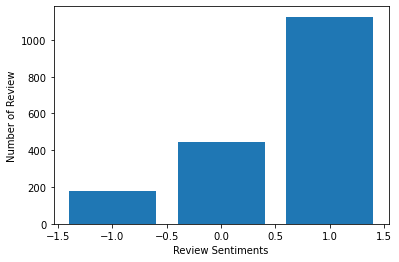

In [23]:
from matplotlib import pyplot as plt
Sentiment_count=df_tweets.groupby('sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['content'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_tweets = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,1))
df_tweets_normalised = tfid_tweets.fit_transform(df_tweets['content'])
df_tweets_normalised

<1753x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 18390 stored elements in Compressed Sparse Row format>

In [29]:
#split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_tweets_normalised, df_tweets['sentiment'], test_size=0.20, random_state=1)

In [30]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
mnb = MultinomialNB().fit(X_train, y_train)
predicted= mnb.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.7207977207977208


In [28]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
#Confusion Matrix 
from sklearn.metrics import confusion_matrix,f1_score
print(confusion_matrix(y_test,predictions))

#f1-score
print(f1_score(y_test,predictions,average='micro'))

#Accuracy_score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions)*100)


[[ 21   4  37]
 [  0  58  72]
 [  0   9 325]]
0.7680608365019012
76.80608365019012
